# Getting deeper with Keras
* Tensorflow is a powerful and flexible tool, but coding large neural architectures with it is tedious.
* There are plenty of deep learning toolkits that work on top of it like Slim, TFLearn, Sonnet, Keras.
* Choice is matter of taste and particular task
* We'll be using Keras

In [1]:
import numpy as np
import keras

/Users/dosya/Projects/lab_iis/jupyter/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [92]:
def load_dataset():
    (X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
    
    X_train = X_train.reshape(X_train.shape[0], np.prod(X_train.shape[1:]))
    y_train = to_categorical(y_train)
    
    X_test = X_test.reshape(X_test.shape[0], np.prod(X_test.shape[1:]))
    y_test = to_categorical(y_test)
    
    # we reserve the last 10000 training examples for validation
    X_train, X_val = X_train[:-10000], X_train[-10000:]
    y_train, y_val = y_train[:-10000], y_train[-10000:]

    return X_train, y_train, X_val, y_val, X_test, y_test

In [94]:
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


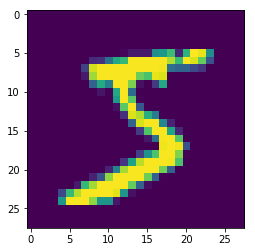

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0].reshape(28, 28))
print(y_train[0])

### Task:
- Build NN using Keras with couple of layers with linear activation function
- Play with variout nonlinear activation functions
- Calculate loss on validation set and plot it for diffrent iterations for all architectures
- Try to normalize data
- Use regularization (L1, L2, Dropout)
- Optimize number of neurons, learning_rate, regularization coefficient and optimizer
- Try Batch Normalization
- Save and load trained model and weights

### Build NN using Keras with couple of layers with linear activation function

In [190]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Input, BatchNormalization, Add
from keras.utils import to_categorical

In [98]:
features_size = X_train.shape[1]
num_classes = 10

In [99]:
model = Sequential()
model.add(Dense(500, input_shape=(features_size,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [100]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 500)               392500    
_________________________________________________________________
activation_13 (Activation)   (None, 500)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                5010      
_________________________________________________________________
activation_14 (Activation)   (None, 10)                0         
Total params: 397,510
Trainable params: 397,510
Non-trainable params: 0
_________________________________________________________________
None


In [101]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [106]:
batch_size = 128
epochs = 5
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/5
45000/45000 [==============================] - 4s 87us/step - loss: 6.0847 - acc: 0.6223 - val_loss: 5.7930 - val_acc: 0.6404
Epoch 2/5
45000/45000 [==============================] - 4s 86us/step - loss: 6.0785 - acc: 0.6228 - val_loss: 5.7380 - val_acc: 0.6440
Epoch 3/5
45000/45000 [==============================] - 4s 91us/step - loss: 6.1145 - acc: 0.6205 - val_loss: 5.7521 - val_acc: 0.6428
Epoch 4/5
45000/45000 [==============================] - 5s 101us/step - loss: 6.2824 - acc: 0.6101 - val_loss: 6.0153 - val_acc: 0.6268
Epoch 5/5
45000/45000 [==============================] - 4s 96us/step - loss: 6.1516 - acc: 0.6182 - val_loss: 5.7561 - val_acc: 0.6428


### Play with variout nonlinear activation functions

In [163]:
model = Sequential()
model.add(Dense(400, kernel_initializer='uniform', input_shape=(features_size,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(400, kernel_initializer='uniform'))
model.add(Activation('tanh'))
model.add(Dropout(0.5))
model.add(Dense(50, kernel_initializer='uniform'))
model.add(Activation('sigmoid'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [164]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [165]:
batch_size = 32
epochs = 5
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/5
45000/45000 [==============================] - 17s 371us/step - loss: 0.9536 - acc: 0.6960 - val_loss: 0.4752 - val_acc: 0.8546
Epoch 2/5
45000/45000 [==============================] - 16s 366us/step - loss: 0.6635 - acc: 0.7823 - val_loss: 0.4259 - val_acc: 0.8704
Epoch 3/5
45000/45000 [==============================] - 15s 342us/step - loss: 0.6585 - acc: 0.7810 - val_loss: 0.4184 - val_acc: 0.8706
Epoch 4/5
45000/45000 [==============================] - 15s 341us/step - loss: 0.6180 - acc: 0.7976 - val_loss: 0.3904 - val_acc: 0.8766
Epoch 5/5
45000/45000 [==============================] - 16s 353us/step - loss: 0.5901 - acc: 0.8043 - val_loss: 0.3847 - val_acc: 0.8784


### Calculate loss on validation set and plot it for diffrent iterations for all architectures

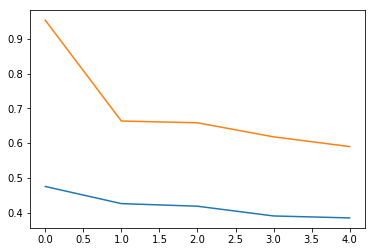

In [168]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])

### Try to normalize data

In [211]:
X_train_normalized = X_train / 255

In [212]:
model = Sequential()
model.add(Dense(400, kernel_initializer='uniform', input_shape=(features_size,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(400, kernel_initializer='uniform'))
model.add(Activation('tanh'))
model.add(Dropout(0.5))
model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None))
model.add(Dense(50, kernel_initializer='uniform'))
model.add(Activation('sigmoid'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [213]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [214]:
batch_size = 32
epochs = 5
history = model.fit(X_train_normalized, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/5
45000/45000 [==============================] - 22s 481us/step - loss: 0.3744 - acc: 0.8980 - val_loss: 0.1881 - val_acc: 0.9462
Epoch 2/5
45000/45000 [==============================] - 18s 395us/step - loss: 0.1994 - acc: 0.9422 - val_loss: 0.1603 - val_acc: 0.9516
Epoch 3/5
45000/45000 [==============================] - 20s 434us/step - loss: 0.1609 - acc: 0.9531 - val_loss: 0.1367 - val_acc: 0.9602
Epoch 4/5
45000/45000 [==============================] - 19s 425us/step - loss: 0.1418 - acc: 0.9577 - val_loss: 0.1319 - val_acc: 0.9630
Epoch 5/5
45000/45000 [==============================] - 18s 408us/step - loss: 0.1272 - acc: 0.9624 - val_loss: 0.1328 - val_acc: 0.9638


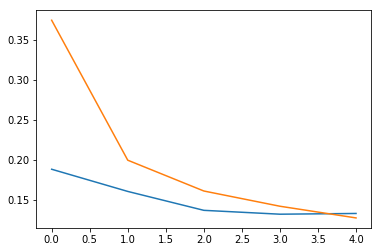

In [215]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])

In [216]:
score = model.evaluate(X_test/255, y_test, batch_size=32)

10000/10000 [==============================] - 1s 108us/step


In [217]:
print('\n')
print('Test score:', score[0])
print('Test accuracy:', score[1])



Test score: 0.08325834806635976
Test accuracy: 0.976


### Use regularization (L1, L2, Dropout)

### Optimize number of neurons, learning_rate, regularization coefficient and optimizer

In [288]:
input1 = Input(shape=(features_size,))
x1 = Dense(8, activation='relu')(input1)
x1 = Dense(400, kernel_initializer='uniform')(x1)
x1 = Activation('relu')(x1)
x1 = Dropout(0.5)(x1)
x1 = Dense(400, kernel_initializer='uniform')(x1)
x1 = Activation('tanh')(x1)
x1 = Dropout(0.5)(x1)
x1 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None)(x1)
x1 = Dense(50, kernel_initializer='uniform')(x1)
x1 = Activation('sigmoid')(x1)
x1 = Dense(num_classes)(x1)

input2 = Input(shape=(features_size,))
x2 = Dense(8, activation='relu')(input2)
x2 = Dense(400, kernel_initializer='uniform')(x2)
x2 = Activation('relu')(x2)
x2 = Dropout(0.5)(x2)
x2 = Dense(400, kernel_initializer='uniform')(x2)
x2 = Activation('tanh')(x2)
x2 = Dropout(0.5)(x2)
x2 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None)(x2)
x2 = Dense(50, kernel_initializer='uniform')(x2)
x2 = Activation('sigmoid')(x2)
x2 = Dense(num_classes)(x2)

input3 = Input(shape=(features_size,))
x3 = Dense(8, activation='relu')(input3)
x3 = Dense(400, kernel_initializer='uniform')(x3)
x3 = Activation('relu')(x3)
x3 = Dropout(0.5)(x3)
x3 = Dense(400, kernel_initializer='uniform')(x3)
x3 = Activation('tanh')(x3)
x3 = Dropout(0.5)(x3)
x3 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None)(x3)
x3 = Dense(50, kernel_initializer='uniform')(x3)
x3 = Activation('sigmoid')(x3)
x3 = Dense(num_classes)(x3)

added = Add()([x2, x3])  # equivalent to added = keras.layers.add([x1, x2])

out = Dense(num_classes)(added)
out = Activation('softmax')(out)
model = keras.models.Model(inputs=[input2, input3], outputs=out)

In [289]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [352]:
from scipy.ndimage.filters import gaussian_filter
from scipy.ndimage import binary_erosion

In [362]:
X_train_normalized1 = X_train_normalized.copy()

X_train_normalized2 = X_train_normalized.copy()
X_train_normalized2[X_train_normalized2 < 0.85] = 0 
X_train_normalized2[X_train_normalized2 >= 0.85] = 1 

X_train_normalized3 = X_train_normalized.copy()
X_train_normalized3[X_train_normalized3 > 0.00 ] = 1
X_train_normalized3 = binary_erosion(X_train_normalized3).astype(X_train_normalized3.dtype)

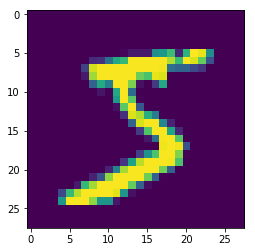

In [363]:
plt.imshow(X_train_normalized1[0].reshape(28, 28))

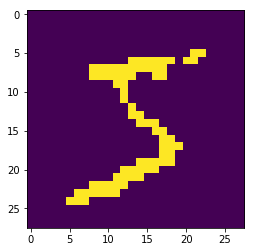

In [364]:
plt.imshow(X_train_normalized2[0].reshape(28, 28))

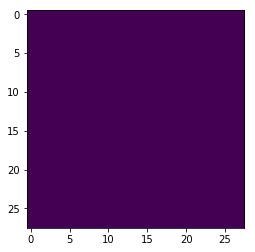

In [365]:
plt.imshow(X_train_normalized3[0].reshape(28, 28))

In [291]:
batch_size = 32
epochs = 5
history = model.fit([X_train_normalized2, X_train_normalized3], y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/5
42976/45000 [===========================>..] - ETA: 0s - loss: 0.6456 - acc: 0.7995

KeyboardInterrupt: 

In [ ]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])

In [223]:
score = model.evaluate(X_test/255, y_test, batch_size=32)

ValueError: Error when checking model input: the list of Numpy arrays that you are passing to your model is not the size the model expected. Expected to see 3 array(s), but instead got the following list of 1 arrays: [array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0....

In [ ]:
print('\n')
print('Test score:', score[0])
print('Test accuracy:', score[1])

### Try Batch Normalization

### Save and load trained model and weights